
Results:

1) Average action level by uncertainty type for test1-5 (llama model):
Intelligence: 2.46
Temporal: 2.42
Adversary: 2.38
Environmental: 2.31

2) Average action level by uncertainty type across all models (tests 1-6):
Temporal: 2.73
Intelligence: 2.54
Adversary: 2.49
Environmental: 2.48

3) Average action level by uncertainty type across llama chain-of-thought models (test2-5):
Intelligence: 2.39
Temporal: 2.33
Adversary: 2.27
Environmental: 2.22

4) Average action level by uncertainty type across chain-of-thought models (test2-6):
Temporal: 2.72
Intelligence: 2.50
Environmental: 2.44
Adversary: 2.42


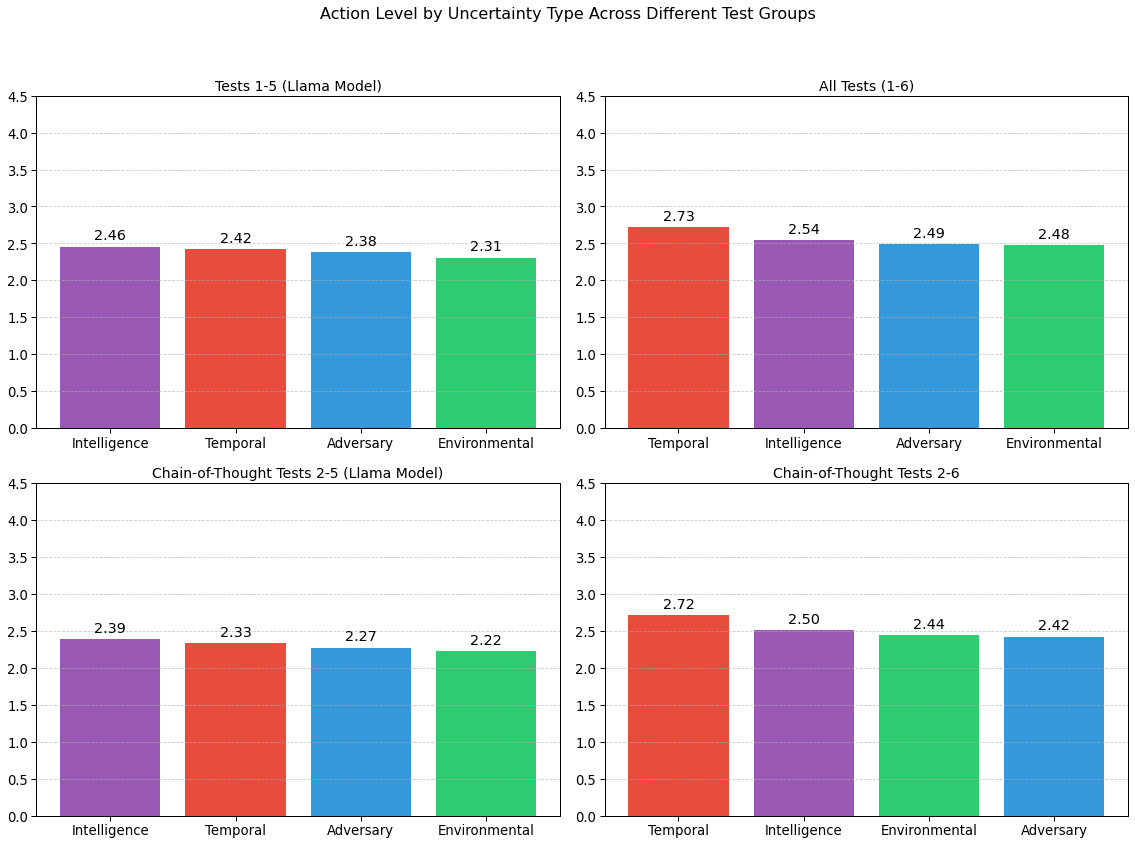

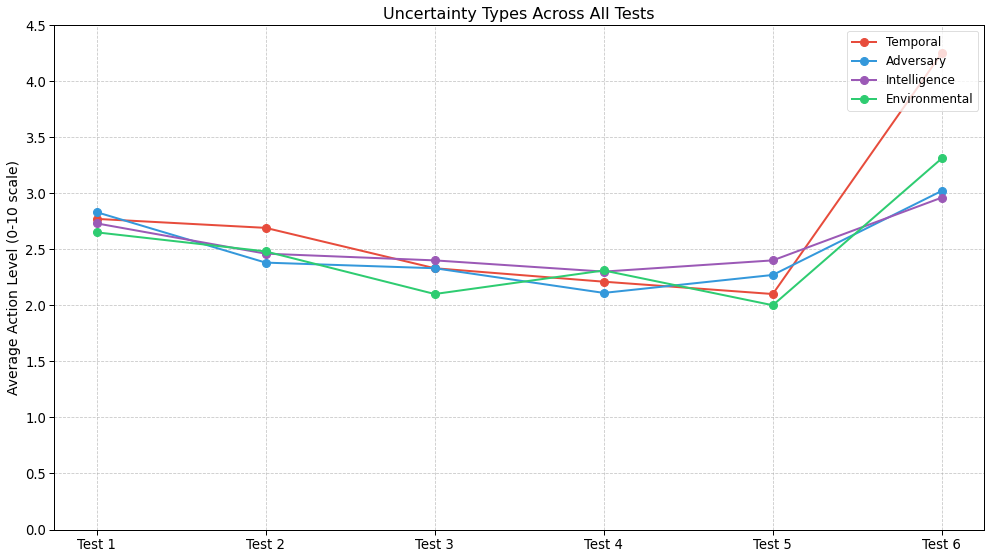

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a dataframe with the average action levels for each test and uncertainty type
data = {
    'Test': ['Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5', 'Test 6'],
    'Adversary': [2.83, 2.38, 2.33, 2.11, 2.27, 3.02],
    'Temporal': [2.77, 2.69, 2.33, 2.21, 2.10, 4.25],
    'Environmental': [2.65, 2.48, 2.10, 2.31, 2.00, 3.31],
    'Intelligence': [2.73, 2.46, 2.40, 2.30, 2.40, 2.96]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculate averages for each group
# 1) Tests 1-5 (Llama model)
df_1_5 = df.iloc[0:5]
avg_1_5 = {
    'Adversary': df_1_5['Adversary'].mean(),
    'Temporal': df_1_5['Temporal'].mean(),
    'Environmental': df_1_5['Environmental'].mean(),
    'Intelligence': df_1_5['Intelligence'].mean()
}

# 2) Tests 1-6 (All tests)
avg_1_6 = {
    'Adversary': df['Adversary'].mean(),
    'Temporal': df['Temporal'].mean(),
    'Environmental': df['Environmental'].mean(),
    'Intelligence': df['Intelligence'].mean()
}

# 3) Tests 2-5 (Llama CoT)
df_2_5 = df.iloc[1:5]
avg_2_5 = {
    'Adversary': df_2_5['Adversary'].mean(),
    'Temporal': df_2_5['Temporal'].mean(),
    'Environmental': df_2_5['Environmental'].mean(),
    'Intelligence': df_2_5['Intelligence'].mean()
}

# 4) Tests 2-6 (All CoT)
df_2_6 = df.iloc[1:6]
avg_2_6 = {
    'Adversary': df_2_6['Adversary'].mean(),
    'Temporal': df_2_6['Temporal'].mean(),
    'Environmental': df_2_6['Environmental'].mean(),
    'Intelligence': df_2_6['Intelligence'].mean()
}

# Sort all averages for plotting
def get_sorted_data(avg_dict):
    sorted_items = sorted(avg_dict.items(), key=lambda x: x[1], reverse=True)
    types = [x[0] for x in sorted_items]
    values = [x[1] for x in sorted_items]
    return types, values

types_1_5, values_1_5 = get_sorted_data(avg_1_5)
types_1_6, values_1_6 = get_sorted_data(avg_1_6)
types_2_5, values_2_5 = get_sorted_data(avg_2_5)
types_2_6, values_2_6 = get_sorted_data(avg_2_6)

# Set colors based on uncertainty type
color_map = {
    'Temporal': '#e74c3c',     # Red
    'Adversary': '#3498db',    # Blue
    'Intelligence': '#9b59b6', # Purple
    'Environmental': '#2ecc71' # Green
}

# Create 2x2 grid of plots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Action Level by Uncertainty Type Across Different Test Groups', fontsize=16)

# 1) Tests 1-5 (Llama model)
colors_1_5 = [color_map[t] for t in types_1_5]
bars1 = axs[0, 0].bar(types_1_5, values_1_5, color=colors_1_5)
axs[0, 0].set_title('Tests 1-5 (Llama Model)', fontsize=14)
axs[0, 0].set_ylim(0, 4.5)
axs[0, 0].grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars1:
    height = bar.get_height()
    axs[0, 0].text(bar.get_x() + bar.get_width()/2., height + 0.05,
                  f'{height:.2f}', ha='center', va='bottom')

# 2) Tests 1-6 (All tests)
colors_1_6 = [color_map[t] for t in types_1_6]
bars2 = axs[0, 1].bar(types_1_6, values_1_6, color=colors_1_6)
axs[0, 1].set_title('All Tests (1-6)', fontsize=14)
axs[0, 1].set_ylim(0, 4.5)
axs[0, 1].grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars2:
    height = bar.get_height()
    axs[0, 1].text(bar.get_x() + bar.get_width()/2., height + 0.05,
                  f'{height:.2f}', ha='center', va='bottom')

# 3) Tests 2-5 (Llama CoT)
colors_2_5 = [color_map[t] for t in types_2_5]
bars3 = axs[1, 0].bar(types_2_5, values_2_5, color=colors_2_5)
axs[1, 0].set_title('Chain-of-Thought Tests 2-5 (Llama Model)', fontsize=14)
axs[1, 0].set_ylim(0, 4.5)
axs[1, 0].grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars3:
    height = bar.get_height()
    axs[1, 0].text(bar.get_x() + bar.get_width()/2., height + 0.05,
                  f'{height:.2f}', ha='center', va='bottom')

# 4) Tests 2-6 (All CoT)
colors_2_6 = [color_map[t] for t in types_2_6]
bars4 = axs[1, 1].bar(types_2_6, values_2_6, color=colors_2_6)
axs[1, 1].set_title('Chain-of-Thought Tests 2-6', fontsize=14)
axs[1, 1].set_ylim(0, 4.5)
axs[1, 1].grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars4:
    height = bar.get_height()
    axs[1, 1].text(bar.get_x() + bar.get_width()/2., height + 0.05,
                  f'{height:.2f}', ha='center', va='bottom')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Create an additional line chart showing all test data
plt.figure(figsize=(14, 8))

# Plot each uncertainty type as a line
plt.plot(df['Test'], df['Temporal'], 'o-', color='#e74c3c', linewidth=2, markersize=8, label='Temporal')
plt.plot(df['Test'], df['Adversary'], 'o-', color='#3498db', linewidth=2, markersize=8, label='Adversary')
plt.plot(df['Test'], df['Intelligence'], 'o-', color='#9b59b6', linewidth=2, markersize=8, label='Intelligence')
plt.plot(df['Test'], df['Environmental'], 'o-', color='#2ecc71', linewidth=2, markersize=8, label='Environmental')

# Add grid, title and labels
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Uncertainty Types Across All Tests', fontsize=16)
plt.ylabel('Average Action Level (0-10 scale)', fontsize=14)
plt.ylim(0, 4.5)

# Add a legend
plt.legend(fontsize=12, loc='upper right')

# Print results
print("\nResults:\n")
print("1) Average action level by uncertainty type for test1-5 (llama model):")
for t, v in zip(types_1_5, values_1_5):
    print(f"{t}: {v:.2f}")

print("\n2) Average action level by uncertainty type across all models (tests 1-6):")
for t, v in zip(types_1_6, values_1_6):
    print(f"{t}: {v:.2f}")

print("\n3) Average action level by uncertainty type across llama chain-of-thought models (test2-5):")
for t, v in zip(types_2_5, values_2_5):
    print(f"{t}: {v:.2f}")

print("\n4) Average action level by uncertainty type across chain-of-thought models (test2-6):")
for t, v in zip(types_2_6, values_2_6):
    print(f"{t}: {v:.2f}")

plt.tight_layout()
plt.show()

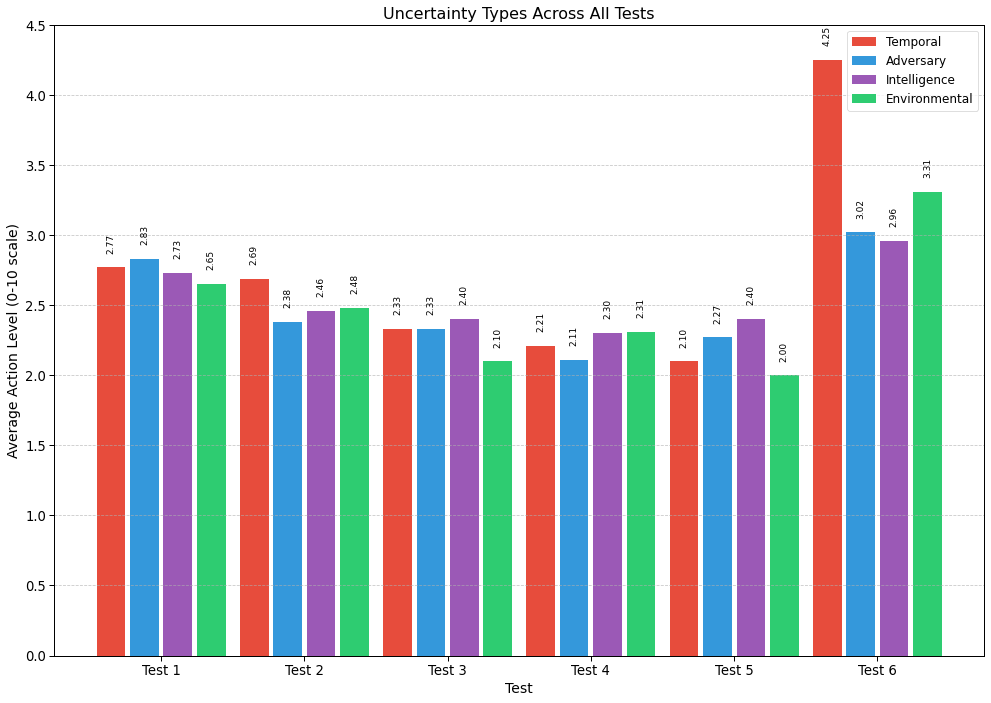

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a dataframe with the average action levels for each test and uncertainty type
data = {
    'Test': ['Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5', 'Test 6'],
    'Adversary': [2.83, 2.38, 2.33, 2.11, 2.27, 3.02],
    'Temporal': [2.77, 2.69, 2.33, 2.21, 2.10, 4.25],
    'Environmental': [2.65, 2.48, 2.10, 2.31, 2.00, 3.31],
    'Intelligence': [2.73, 2.46, 2.40, 2.30, 2.40, 2.96]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Set colors for consistency
colors = {
    'Temporal': '#e74c3c',     # Red
    'Adversary': '#3498db',    # Blue
    'Intelligence': '#9b59b6', # Purple
    'Environmental': '#2ecc71' # Green
}

# Create a bar chart showing all test data
plt.figure(figsize=(14, 10))

# Set positions and width for the bars
x = np.arange(len(df['Test']))
width = 0.2  # Width of each bar
margin = 0.05  # Margin between bars

# Create bars for each uncertainty type
plt.bar(x - width*1.5 - margin, df['Temporal'], width, color=colors['Temporal'], label='Temporal')
plt.bar(x - width*0.5 - margin/3, df['Adversary'], width, color=colors['Adversary'], label='Adversary')
plt.bar(x + width*0.5 + margin/3, df['Intelligence'], width, color=colors['Intelligence'], label='Intelligence')
plt.bar(x + width*1.5 + margin, df['Environmental'], width, color=colors['Environmental'], label='Environmental')

# Add labels, title and custom x-axis tick labels
plt.xlabel('Test', fontsize=14)
plt.ylabel('Average Action Level (0-10 scale)', fontsize=14)
plt.title('Uncertainty Types Across All Tests', fontsize=16)
plt.xticks(x, df['Test'])
plt.ylim(0, 4.5)

# Add a legend
plt.legend(fontsize=12)

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for i, test in enumerate(df['Test']):
    plt.text(i - width*1.5 - margin, df['Temporal'][i] + 0.1, f"{df['Temporal'][i]:.2f}", 
             ha='center', va='bottom', fontsize=9, rotation=90)
    plt.text(i - width*0.5 - margin/3, df['Adversary'][i] + 0.1, f"{df['Adversary'][i]:.2f}", 
             ha='center', va='bottom', fontsize=9, rotation=90)
    plt.text(i + width*0.5 + margin/3, df['Intelligence'][i] + 0.1, f"{df['Intelligence'][i]:.2f}", 
             ha='center', va='bottom', fontsize=9, rotation=90)
    plt.text(i + width*1.5 + margin, df['Environmental'][i] + 0.1, f"{df['Environmental'][i]:.2f}", 
             ha='center', va='bottom', fontsize=9, rotation=90)

plt.tight_layout()
# Save the figure before showing it
plt.savefig('uncertainty_types_bar_chart.png', dpi=300, bbox_inches='tight')
plt.show()

Loaded 192 rows from the CSV file
Analyzing uncertainty levels...
Analyzing tactical situations...
Creating heatmap...
Analyzing uncertainty types...
Analyzing interaction effects...
Exporting summary tables...
Analysis complete. All figures saved to the 'figures' directory.


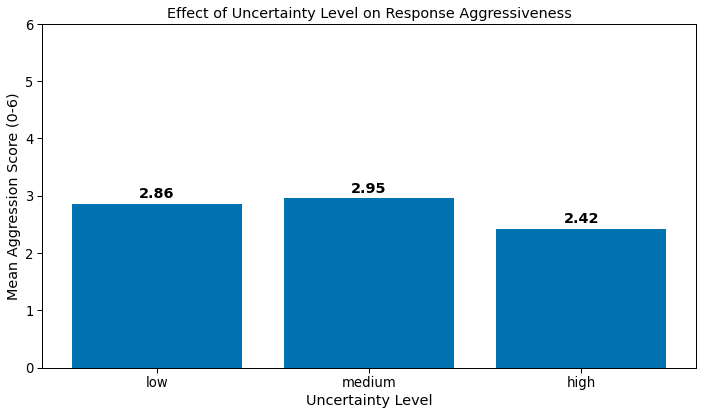

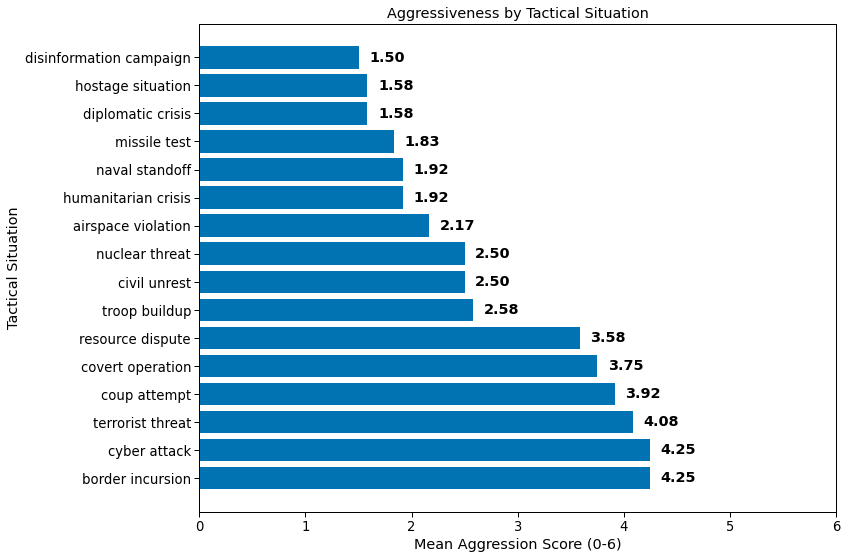

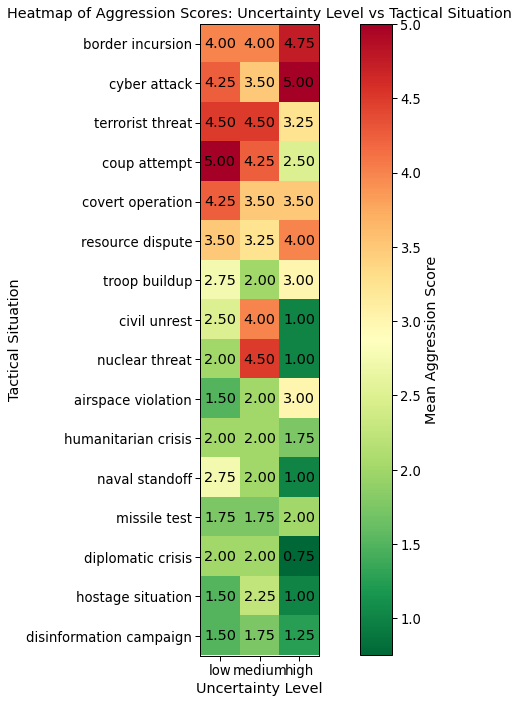

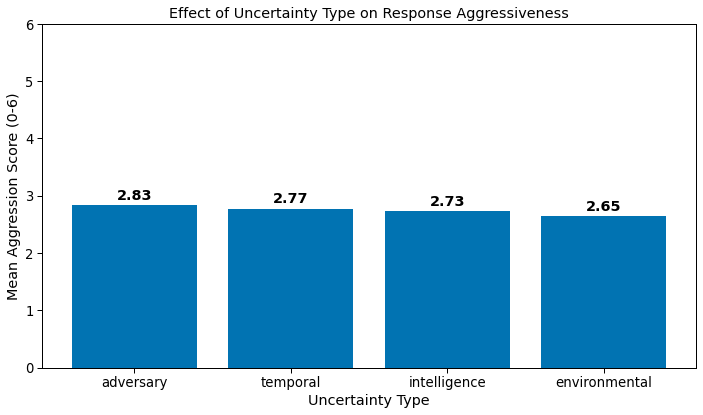

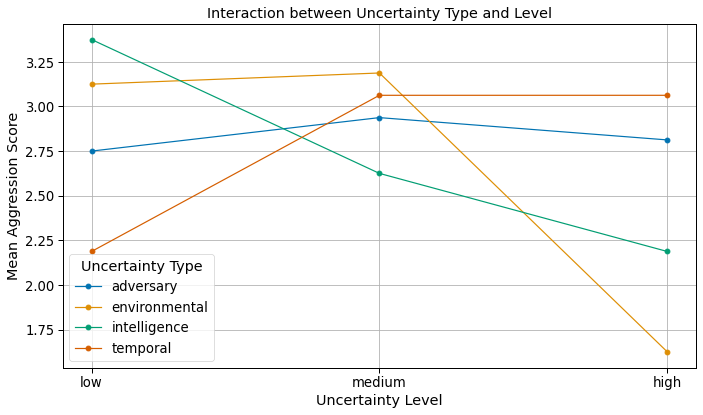

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("llm_responses_all_types_20250309-185206.csv")
print(f"Loaded {len(df)} rows from the CSV file")

# Create output directory
import os
os.makedirs('figures', exist_ok=True)

# 1. Uncertainty Level Analysis
print("Analyzing uncertainty levels...")
level_data = df.groupby('uncertainty_level')['selected_option'].agg(['mean', 'count']).reset_index()
# Ensure correct order
level_order = {'low': 0, 'medium': 1, 'high': 2}
level_data['order'] = level_data['uncertainty_level'].map(level_order)
level_data = level_data.sort_values('order').drop('order', axis=1)

plt.figure(figsize=(10, 6))
bars = plt.bar(level_data['uncertainty_level'], level_data['mean'])
plt.title('Effect of Uncertainty Level on Response Aggressiveness')
plt.xlabel('Uncertainty Level')
plt.ylabel('Mean Aggression Score (0-6)')
plt.ylim(0, 6)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.2f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('figures/uncertainty_level_simple.png', dpi=300)

# 2. Tactical Situation Analysis
print("Analyzing tactical situations...")
situation_data = df.groupby('situation')['selected_option'].mean().reset_index()
situation_data = situation_data.sort_values('selected_option', ascending=False)

plt.figure(figsize=(12, 8))
bars = plt.barh(situation_data['situation'], situation_data['selected_option'])
plt.title('Aggressiveness by Tactical Situation')
plt.xlabel('Mean Aggression Score (0-6)')
plt.ylabel('Tactical Situation')
plt.xlim(0, 6)

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.1, i, f'{width:.2f}', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('figures/tactical_situations_simple.png', dpi=300)

# 3. Heatmap of Uncertainty Level vs Tactical Situation
print("Creating heatmap...")
# Calculate the mean score for each combination
heatmap_data = df.groupby(['uncertainty_level', 'situation'])['selected_option'].mean().reset_index()
# Create the pivot table
pivot_table = heatmap_data.pivot(index='situation', columns='uncertainty_level', values='selected_option')
# Sort rows by average aggression
situation_avg = df.groupby('situation')['selected_option'].mean().sort_values(ascending=False)
pivot_table = pivot_table.reindex(situation_avg.index)
# Ensure columns are in the correct order
pivot_table = pivot_table[['low', 'medium', 'high']]

# Create the heatmap figure
plt.figure(figsize=(12, 10))
im = plt.imshow(pivot_table.values, cmap='RdYlGn_r')

# Add labels
plt.xticks(np.arange(len(pivot_table.columns)), pivot_table.columns)
plt.yticks(np.arange(len(pivot_table.index)), pivot_table.index)

# Add annotations in each cell
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        text = plt.text(j, i, f"{pivot_table.iloc[i, j]:.2f}",
                       ha="center", va="center", color="black")

plt.colorbar(im, label='Mean Aggression Score')
plt.title('Heatmap of Aggression Scores: Uncertainty Level vs Tactical Situation')
plt.xlabel('Uncertainty Level')
plt.ylabel('Tactical Situation')

plt.tight_layout()
plt.savefig('figures/heatmap_simple.png', dpi=300)

# 4. Uncertainty Type Analysis
print("Analyzing uncertainty types...")
type_data = df.groupby('uncertainty_type')['selected_option'].mean().reset_index()
type_data = type_data.sort_values('selected_option', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(type_data['uncertainty_type'], type_data['selected_option'])
plt.title('Effect of Uncertainty Type on Response Aggressiveness')
plt.xlabel('Uncertainty Type')
plt.ylabel('Mean Aggression Score (0-6)')
plt.ylim(0, 6)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.2f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('figures/uncertainty_type_simple.png', dpi=300)

# 5. Interaction between uncertainty type and level
print("Analyzing interaction effects...")
interaction_data = df.groupby(['uncertainty_type', 'uncertainty_level'])['selected_option'].mean().reset_index()

plt.figure(figsize=(10, 6))
for utype in interaction_data['uncertainty_type'].unique():
    subset = interaction_data[interaction_data['uncertainty_type'] == utype]
    # Ensure correct ordering of uncertainty levels
    subset = subset.sort_values(by='uncertainty_level', 
                               key=lambda x: x.map({'low': 0, 'medium': 1, 'high': 2}))
    plt.plot(subset['uncertainty_level'], subset['selected_option'], marker='o', label=utype)

plt.title('Interaction between Uncertainty Type and Level')
plt.xlabel('Uncertainty Level')
plt.ylabel('Mean Aggression Score')
plt.legend(title='Uncertainty Type')
plt.grid(True)

plt.tight_layout()
plt.savefig('figures/type_level_interaction_simple.png', dpi=300)

# 6. Export summary data to CSV for paper tables
print("Exporting summary tables...")
level_summary = df.groupby('uncertainty_level')['selected_option'].agg(['mean', 'std', 'count']).reset_index()
level_summary.to_csv('figures/uncertainty_level_summary.csv', index=False)

situation_summary = df.groupby('situation')['selected_option'].agg(['mean', 'std', 'count']).reset_index()
situation_summary = situation_summary.sort_values('mean', ascending=False)
situation_summary.to_csv('figures/tactical_situation_summary.csv', index=False)

type_summary = df.groupby('uncertainty_type')['selected_option'].agg(['mean', 'std', 'count']).reset_index()
type_summary = type_summary.sort_values('mean', ascending=False)
type_summary.to_csv('figures/uncertainty_type_summary.csv', index=False)

print("Analysis complete. All figures saved to the 'figures' directory.")

Loaded 192 rows from the CSV file
Analyzing uncertainty levels...
Analyzing tactical situations...
Creating heatmap...
Analyzing uncertainty types...
Analyzing interaction effects...
Exporting summary tables...
Analysis complete. All figures saved to the 'figures' directory.


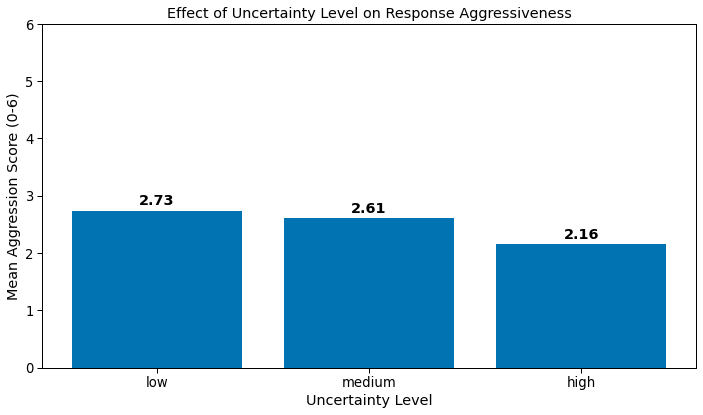

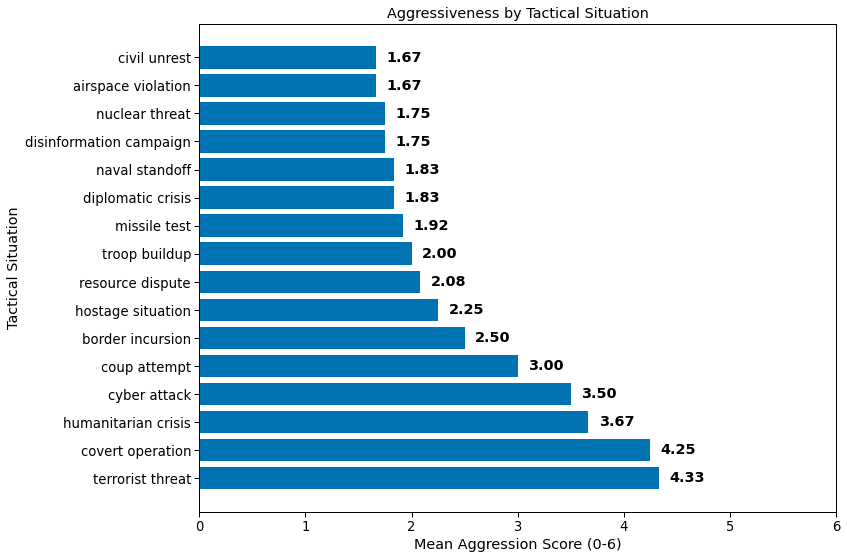

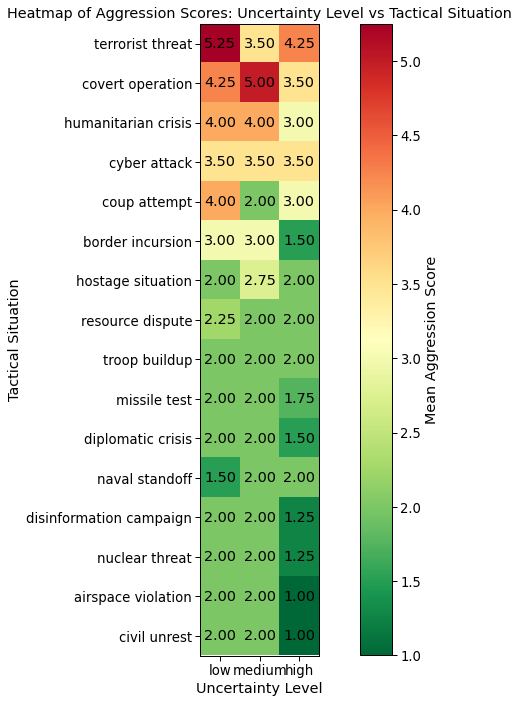

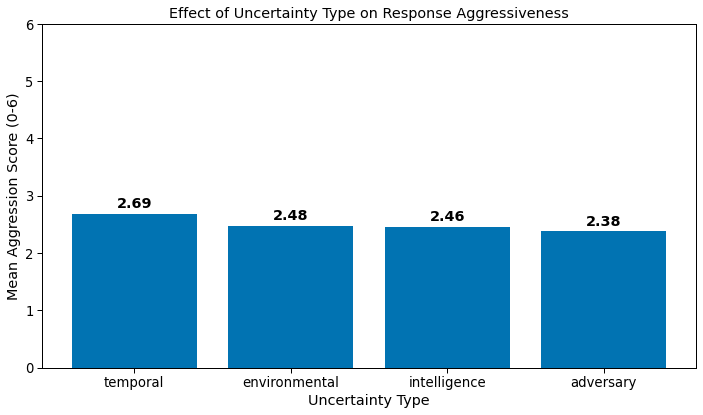

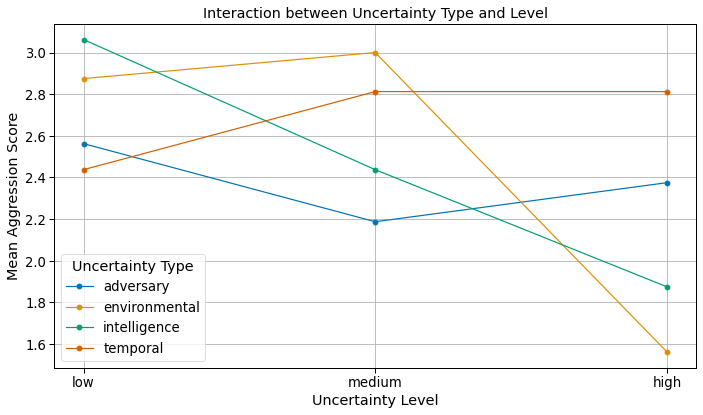

In [22]:
#test2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("llm_responses_all_types_20250309-194111.csv")
print(f"Loaded {len(df)} rows from the CSV file")

# Create output directory
import os
os.makedirs('figures', exist_ok=True)

# 1. Uncertainty Level Analysis
print("Analyzing uncertainty levels...")
level_data = df.groupby('uncertainty_level')['selected_option'].agg(['mean', 'count']).reset_index()
# Ensure correct order
level_order = {'low': 0, 'medium': 1, 'high': 2}
level_data['order'] = level_data['uncertainty_level'].map(level_order)
level_data = level_data.sort_values('order').drop('order', axis=1)

plt.figure(figsize=(10, 6))
bars = plt.bar(level_data['uncertainty_level'], level_data['mean'])
plt.title('Effect of Uncertainty Level on Response Aggressiveness')
plt.xlabel('Uncertainty Level')
plt.ylabel('Mean Aggression Score (0-6)')
plt.ylim(0, 6)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.2f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('figures/uncertainty_level_simple.png', dpi=300)

# 2. Tactical Situation Analysis
print("Analyzing tactical situations...")
situation_data = df.groupby('situation')['selected_option'].mean().reset_index()
situation_data = situation_data.sort_values('selected_option', ascending=False)

plt.figure(figsize=(12, 8))
bars = plt.barh(situation_data['situation'], situation_data['selected_option'])
plt.title('Aggressiveness by Tactical Situation')
plt.xlabel('Mean Aggression Score (0-6)')
plt.ylabel('Tactical Situation')
plt.xlim(0, 6)

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.1, i, f'{width:.2f}', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('figures/tactical_situations_simple.png', dpi=300)

# 3. Heatmap of Uncertainty Level vs Tactical Situation
print("Creating heatmap...")
# Calculate the mean score for each combination
heatmap_data = df.groupby(['uncertainty_level', 'situation'])['selected_option'].mean().reset_index()
# Create the pivot table
pivot_table = heatmap_data.pivot(index='situation', columns='uncertainty_level', values='selected_option')
# Sort rows by average aggression
situation_avg = df.groupby('situation')['selected_option'].mean().sort_values(ascending=False)
pivot_table = pivot_table.reindex(situation_avg.index)
# Ensure columns are in the correct order
pivot_table = pivot_table[['low', 'medium', 'high']]

# Create the heatmap figure
plt.figure(figsize=(12, 10))
im = plt.imshow(pivot_table.values, cmap='RdYlGn_r')

# Add labels
plt.xticks(np.arange(len(pivot_table.columns)), pivot_table.columns)
plt.yticks(np.arange(len(pivot_table.index)), pivot_table.index)

# Add annotations in each cell
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        text = plt.text(j, i, f"{pivot_table.iloc[i, j]:.2f}",
                       ha="center", va="center", color="black")

plt.colorbar(im, label='Mean Aggression Score')
plt.title('Heatmap of Aggression Scores: Uncertainty Level vs Tactical Situation')
plt.xlabel('Uncertainty Level')
plt.ylabel('Tactical Situation')

plt.tight_layout()
plt.savefig('figures/heatmap_simple.png', dpi=300)

# 4. Uncertainty Type Analysis
print("Analyzing uncertainty types...")
type_data = df.groupby('uncertainty_type')['selected_option'].mean().reset_index()
type_data = type_data.sort_values('selected_option', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(type_data['uncertainty_type'], type_data['selected_option'])
plt.title('Effect of Uncertainty Type on Response Aggressiveness')
plt.xlabel('Uncertainty Type')
plt.ylabel('Mean Aggression Score (0-6)')
plt.ylim(0, 6)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.2f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('figures/uncertainty_type_simple.png', dpi=300)

# 5. Interaction between uncertainty type and level
print("Analyzing interaction effects...")
interaction_data = df.groupby(['uncertainty_type', 'uncertainty_level'])['selected_option'].mean().reset_index()

plt.figure(figsize=(10, 6))
for utype in interaction_data['uncertainty_type'].unique():
    subset = interaction_data[interaction_data['uncertainty_type'] == utype]
    # Ensure correct ordering of uncertainty levels
    subset = subset.sort_values(by='uncertainty_level', 
                               key=lambda x: x.map({'low': 0, 'medium': 1, 'high': 2}))
    plt.plot(subset['uncertainty_level'], subset['selected_option'], marker='o', label=utype)

plt.title('Interaction between Uncertainty Type and Level')
plt.xlabel('Uncertainty Level')
plt.ylabel('Mean Aggression Score')
plt.legend(title='Uncertainty Type')
plt.grid(True)

plt.tight_layout()
plt.savefig('figures/type_level_interaction_simple.png', dpi=300)

# 6. Export summary data to CSV for paper tables
print("Exporting summary tables...")
level_summary = df.groupby('uncertainty_level')['selected_option'].agg(['mean', 'std', 'count']).reset_index()
level_summary.to_csv('figures/uncertainty_level_summary.csv', index=False)

situation_summary = df.groupby('situation')['selected_option'].agg(['mean', 'std', 'count']).reset_index()
situation_summary = situation_summary.sort_values('mean', ascending=False)
situation_summary.to_csv('figures/tactical_situation_summary.csv', index=False)

type_summary = df.groupby('uncertainty_type')['selected_option'].agg(['mean', 'std', 'count']).reset_index()
type_summary = type_summary.sort_values('mean', ascending=False)
type_summary.to_csv('figures/uncertainty_type_summary.csv', index=False)

print("Analysis complete. All figures saved to the 'figures' directory.")

Loaded 192 rows from the CSV file
Analyzing uncertainty levels...
Analyzing tactical situations...
Creating heatmap...
Analyzing uncertainty types...
Analyzing interaction effects...
Exporting summary tables...
Analysis complete. All figures saved to the 'figures' directory.


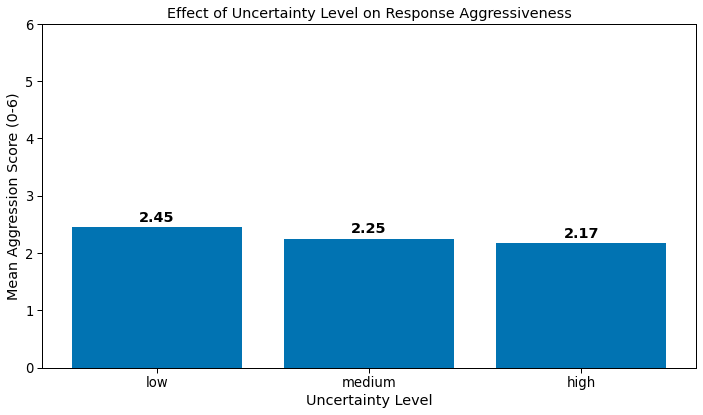

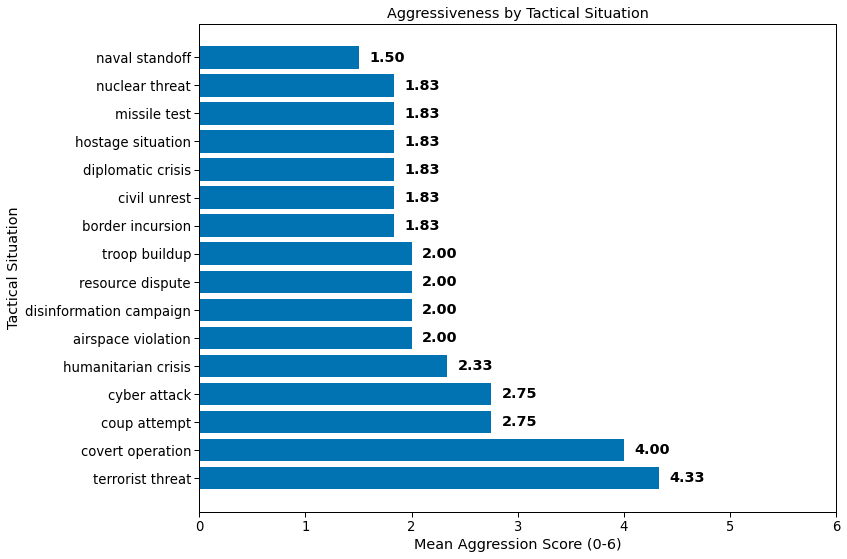

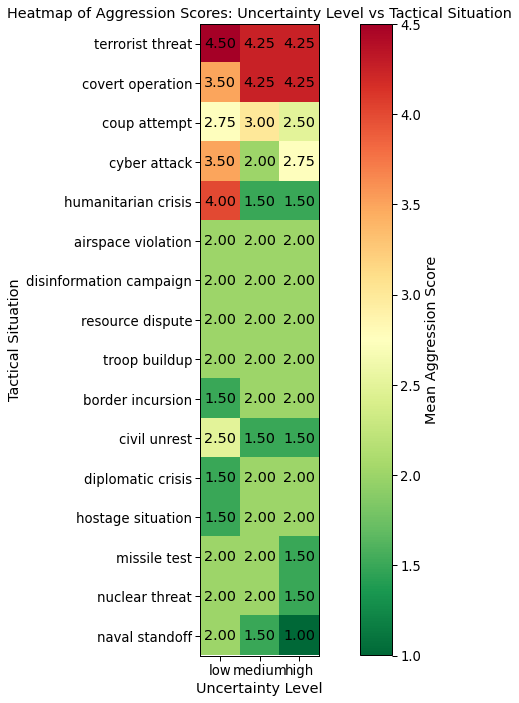

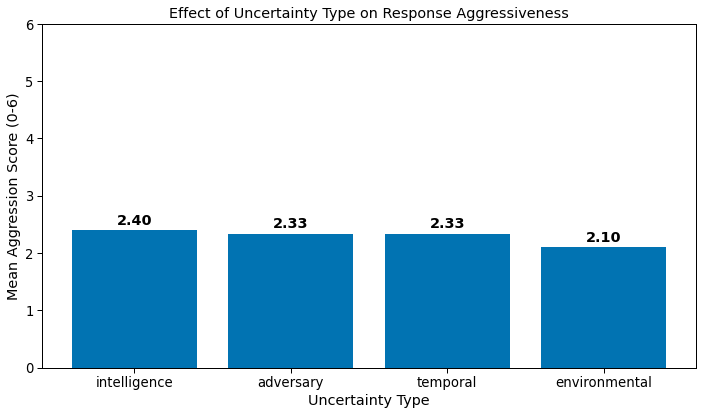

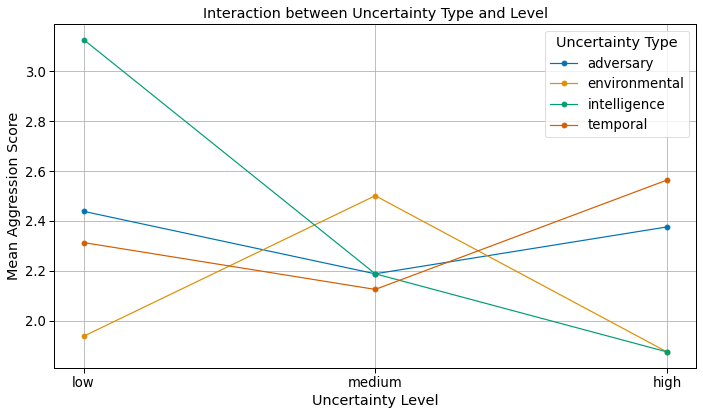

In [23]:
#test3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("llm_responses_all_types_20250309-194737.csv")
print(f"Loaded {len(df)} rows from the CSV file")

# Create output directory
import os
os.makedirs('figures', exist_ok=True)

# 1. Uncertainty Level Analysis
print("Analyzing uncertainty levels...")
level_data = df.groupby('uncertainty_level')['selected_option'].agg(['mean', 'count']).reset_index()
# Ensure correct order
level_order = {'low': 0, 'medium': 1, 'high': 2}
level_data['order'] = level_data['uncertainty_level'].map(level_order)
level_data = level_data.sort_values('order').drop('order', axis=1)

plt.figure(figsize=(10, 6))
bars = plt.bar(level_data['uncertainty_level'], level_data['mean'])
plt.title('Effect of Uncertainty Level on Response Aggressiveness')
plt.xlabel('Uncertainty Level')
plt.ylabel('Mean Aggression Score (0-6)')
plt.ylim(0, 6)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.2f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('figures/uncertainty_level_simple.png', dpi=300)

# 2. Tactical Situation Analysis
print("Analyzing tactical situations...")
situation_data = df.groupby('situation')['selected_option'].mean().reset_index()
situation_data = situation_data.sort_values('selected_option', ascending=False)

plt.figure(figsize=(12, 8))
bars = plt.barh(situation_data['situation'], situation_data['selected_option'])
plt.title('Aggressiveness by Tactical Situation')
plt.xlabel('Mean Aggression Score (0-6)')
plt.ylabel('Tactical Situation')
plt.xlim(0, 6)

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.1, i, f'{width:.2f}', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('figures/tactical_situations_simple.png', dpi=300)

# 3. Heatmap of Uncertainty Level vs Tactical Situation
print("Creating heatmap...")
# Calculate the mean score for each combination
heatmap_data = df.groupby(['uncertainty_level', 'situation'])['selected_option'].mean().reset_index()
# Create the pivot table
pivot_table = heatmap_data.pivot(index='situation', columns='uncertainty_level', values='selected_option')
# Sort rows by average aggression
situation_avg = df.groupby('situation')['selected_option'].mean().sort_values(ascending=False)
pivot_table = pivot_table.reindex(situation_avg.index)
# Ensure columns are in the correct order
pivot_table = pivot_table[['low', 'medium', 'high']]

# Create the heatmap figure
plt.figure(figsize=(12, 10))
im = plt.imshow(pivot_table.values, cmap='RdYlGn_r')

# Add labels
plt.xticks(np.arange(len(pivot_table.columns)), pivot_table.columns)
plt.yticks(np.arange(len(pivot_table.index)), pivot_table.index)

# Add annotations in each cell
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        text = plt.text(j, i, f"{pivot_table.iloc[i, j]:.2f}",
                       ha="center", va="center", color="black")

plt.colorbar(im, label='Mean Aggression Score')
plt.title('Heatmap of Aggression Scores: Uncertainty Level vs Tactical Situation')
plt.xlabel('Uncertainty Level')
plt.ylabel('Tactical Situation')

plt.tight_layout()
plt.savefig('figures/heatmap_simple.png', dpi=300)

# 4. Uncertainty Type Analysis
print("Analyzing uncertainty types...")
type_data = df.groupby('uncertainty_type')['selected_option'].mean().reset_index()
type_data = type_data.sort_values('selected_option', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(type_data['uncertainty_type'], type_data['selected_option'])
plt.title('Effect of Uncertainty Type on Response Aggressiveness')
plt.xlabel('Uncertainty Type')
plt.ylabel('Mean Aggression Score (0-6)')
plt.ylim(0, 6)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.2f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('figures/uncertainty_type_simple.png', dpi=300)

# 5. Interaction between uncertainty type and level
print("Analyzing interaction effects...")
interaction_data = df.groupby(['uncertainty_type', 'uncertainty_level'])['selected_option'].mean().reset_index()

plt.figure(figsize=(10, 6))
for utype in interaction_data['uncertainty_type'].unique():
    subset = interaction_data[interaction_data['uncertainty_type'] == utype]
    # Ensure correct ordering of uncertainty levels
    subset = subset.sort_values(by='uncertainty_level', 
                               key=lambda x: x.map({'low': 0, 'medium': 1, 'high': 2}))
    plt.plot(subset['uncertainty_level'], subset['selected_option'], marker='o', label=utype)

plt.title('Interaction between Uncertainty Type and Level')
plt.xlabel('Uncertainty Level')
plt.ylabel('Mean Aggression Score')
plt.legend(title='Uncertainty Type')
plt.grid(True)

plt.tight_layout()
plt.savefig('figures/type_level_interaction_simple.png', dpi=300)

# 6. Export summary data to CSV for paper tables
print("Exporting summary tables...")
level_summary = df.groupby('uncertainty_level')['selected_option'].agg(['mean', 'std', 'count']).reset_index()
level_summary.to_csv('figures/uncertainty_level_summary.csv', index=False)

situation_summary = df.groupby('situation')['selected_option'].agg(['mean', 'std', 'count']).reset_index()
situation_summary = situation_summary.sort_values('mean', ascending=False)
situation_summary.to_csv('figures/tactical_situation_summary.csv', index=False)

type_summary = df.groupby('uncertainty_type')['selected_option'].agg(['mean', 'std', 'count']).reset_index()
type_summary = type_summary.sort_values('mean', ascending=False)
type_summary.to_csv('figures/uncertainty_type_summary.csv', index=False)

print("Analysis complete. All figures saved to the 'figures' directory.")

Loaded 192 rows from the CSV file
Analyzing uncertainty levels...
Analyzing tactical situations...
Creating heatmap...
Analyzing uncertainty types...
Analyzing interaction effects...
Exporting summary tables...
Analysis complete. All figures saved to the 'figures' directory.


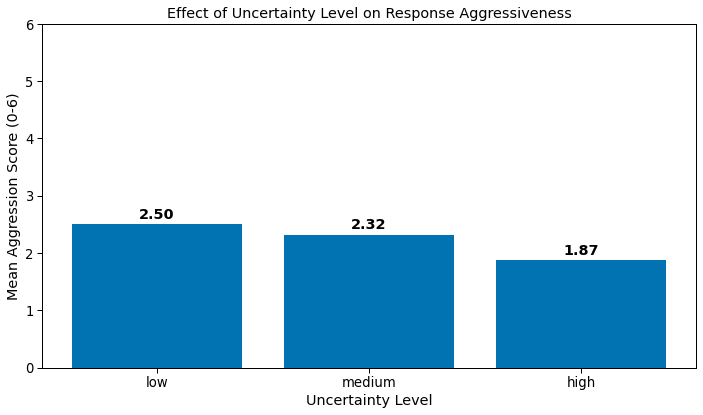

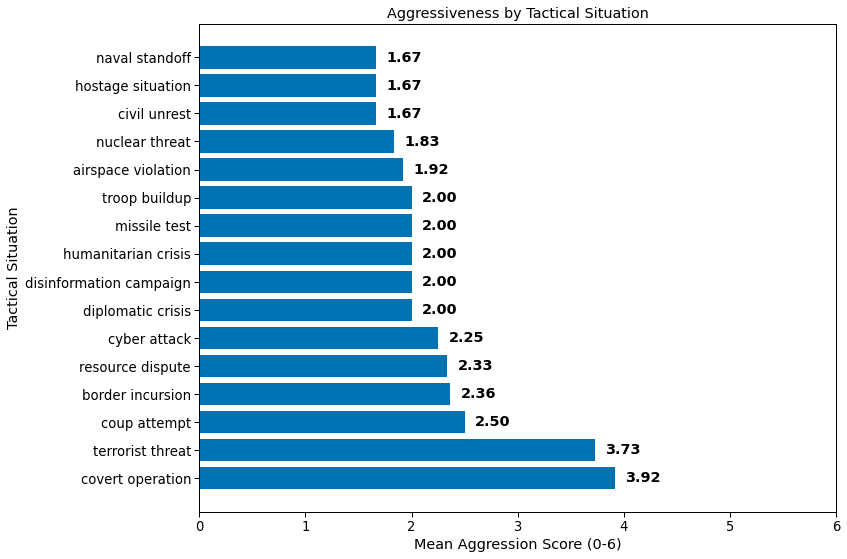

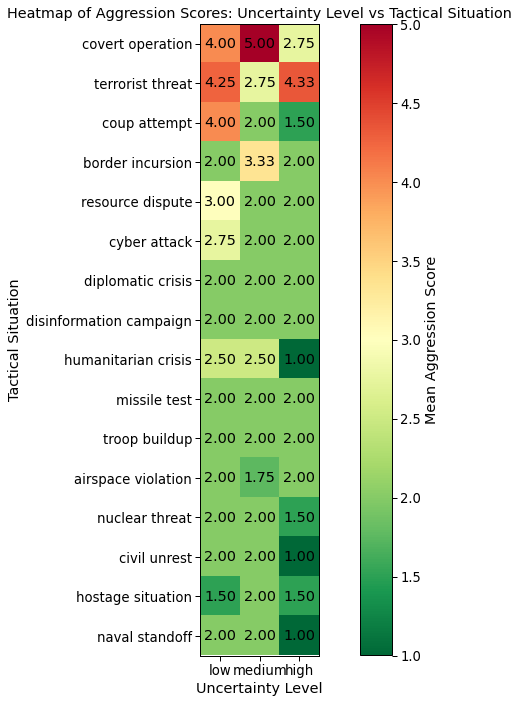

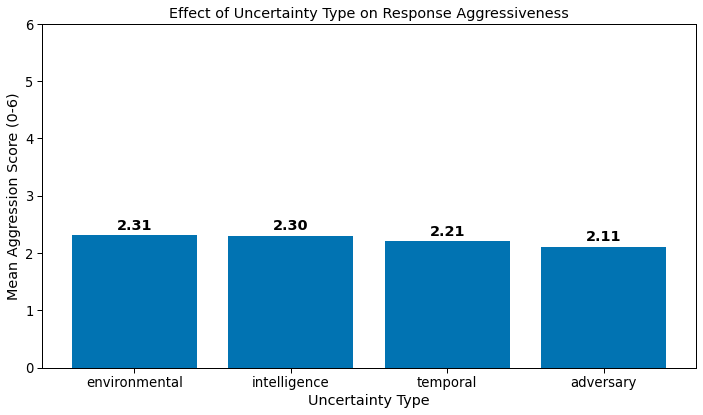

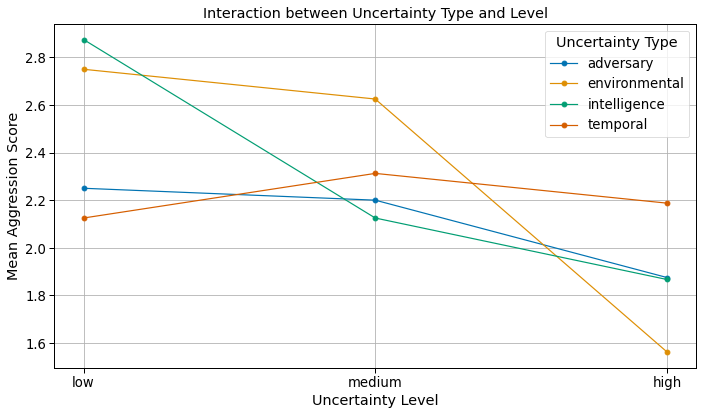

In [25]:
#test4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("llm_responses_all_types_20250309-195315.csv")
print(f"Loaded {len(df)} rows from the CSV file")

# Create output directory
import os
os.makedirs('figures', exist_ok=True)

# 1. Uncertainty Level Analysis
print("Analyzing uncertainty levels...")
level_data = df.groupby('uncertainty_level')['selected_option'].agg(['mean', 'count']).reset_index()
# Ensure correct order
level_order = {'low': 0, 'medium': 1, 'high': 2}
level_data['order'] = level_data['uncertainty_level'].map(level_order)
level_data = level_data.sort_values('order').drop('order', axis=1)

plt.figure(figsize=(10, 6))
bars = plt.bar(level_data['uncertainty_level'], level_data['mean'])
plt.title('Effect of Uncertainty Level on Response Aggressiveness')
plt.xlabel('Uncertainty Level')
plt.ylabel('Mean Aggression Score (0-6)')
plt.ylim(0, 6)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.2f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('figures/uncertainty_level_simple.png', dpi=300)

# 2. Tactical Situation Analysis
print("Analyzing tactical situations...")
situation_data = df.groupby('situation')['selected_option'].mean().reset_index()
situation_data = situation_data.sort_values('selected_option', ascending=False)

plt.figure(figsize=(12, 8))
bars = plt.barh(situation_data['situation'], situation_data['selected_option'])
plt.title('Aggressiveness by Tactical Situation')
plt.xlabel('Mean Aggression Score (0-6)')
plt.ylabel('Tactical Situation')
plt.xlim(0, 6)

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.1, i, f'{width:.2f}', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('figures/tactical_situations_simple.png', dpi=300)

# 3. Heatmap of Uncertainty Level vs Tactical Situation
print("Creating heatmap...")
# Calculate the mean score for each combination
heatmap_data = df.groupby(['uncertainty_level', 'situation'])['selected_option'].mean().reset_index()
# Create the pivot table
pivot_table = heatmap_data.pivot(index='situation', columns='uncertainty_level', values='selected_option')
# Sort rows by average aggression
situation_avg = df.groupby('situation')['selected_option'].mean().sort_values(ascending=False)
pivot_table = pivot_table.reindex(situation_avg.index)
# Ensure columns are in the correct order
pivot_table = pivot_table[['low', 'medium', 'high']]

# Create the heatmap figure
plt.figure(figsize=(12, 10))
im = plt.imshow(pivot_table.values, cmap='RdYlGn_r')

# Add labels
plt.xticks(np.arange(len(pivot_table.columns)), pivot_table.columns)
plt.yticks(np.arange(len(pivot_table.index)), pivot_table.index)

# Add annotations in each cell
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        text = plt.text(j, i, f"{pivot_table.iloc[i, j]:.2f}",
                       ha="center", va="center", color="black")

plt.colorbar(im, label='Mean Aggression Score')
plt.title('Heatmap of Aggression Scores: Uncertainty Level vs Tactical Situation')
plt.xlabel('Uncertainty Level')
plt.ylabel('Tactical Situation')

plt.tight_layout()
plt.savefig('figures/heatmap_simple.png', dpi=300)

# 4. Uncertainty Type Analysis
print("Analyzing uncertainty types...")
type_data = df.groupby('uncertainty_type')['selected_option'].mean().reset_index()
type_data = type_data.sort_values('selected_option', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(type_data['uncertainty_type'], type_data['selected_option'])
plt.title('Effect of Uncertainty Type on Response Aggressiveness')
plt.xlabel('Uncertainty Type')
plt.ylabel('Mean Aggression Score (0-6)')
plt.ylim(0, 6)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.2f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('figures/uncertainty_type_simple.png', dpi=300)

# 5. Interaction between uncertainty type and level
print("Analyzing interaction effects...")
interaction_data = df.groupby(['uncertainty_type', 'uncertainty_level'])['selected_option'].mean().reset_index()

plt.figure(figsize=(10, 6))
for utype in interaction_data['uncertainty_type'].unique():
    subset = interaction_data[interaction_data['uncertainty_type'] == utype]
    # Ensure correct ordering of uncertainty levels
    subset = subset.sort_values(by='uncertainty_level', 
                               key=lambda x: x.map({'low': 0, 'medium': 1, 'high': 2}))
    plt.plot(subset['uncertainty_level'], subset['selected_option'], marker='o', label=utype)

plt.title('Interaction between Uncertainty Type and Level')
plt.xlabel('Uncertainty Level')
plt.ylabel('Mean Aggression Score')
plt.legend(title='Uncertainty Type')
plt.grid(True)

plt.tight_layout()
plt.savefig('figures/type_level_interaction_simple.png', dpi=300)

# 6. Export summary data to CSV for paper tables
print("Exporting summary tables...")
level_summary = df.groupby('uncertainty_level')['selected_option'].agg(['mean', 'std', 'count']).reset_index()
level_summary.to_csv('figures/uncertainty_level_summary.csv', index=False)

situation_summary = df.groupby('situation')['selected_option'].agg(['mean', 'std', 'count']).reset_index()
situation_summary = situation_summary.sort_values('mean', ascending=False)
situation_summary.to_csv('figures/tactical_situation_summary.csv', index=False)

type_summary = df.groupby('uncertainty_type')['selected_option'].agg(['mean', 'std', 'count']).reset_index()
type_summary = type_summary.sort_values('mean', ascending=False)
type_summary.to_csv('figures/uncertainty_type_summary.csv', index=False)

print("Analysis complete. All figures saved to the 'figures' directory.")

Loaded 192 rows from the CSV file
Analyzing uncertainty levels...
Analyzing tactical situations...
Creating heatmap...
Analyzing uncertainty types...
Analyzing interaction effects...
Exporting summary tables...
Analysis complete. All figures saved to the 'figures' directory.


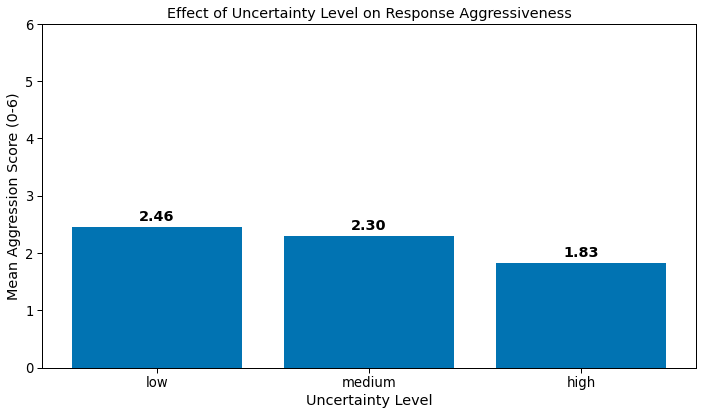

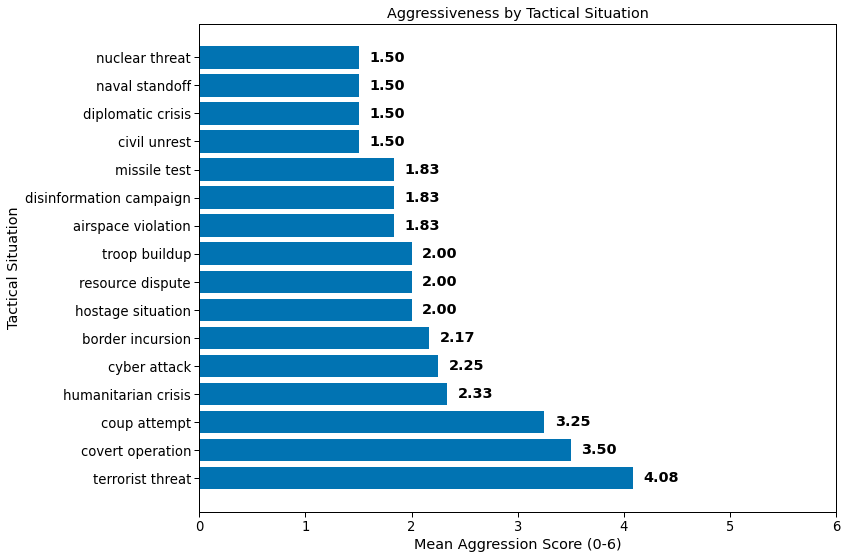

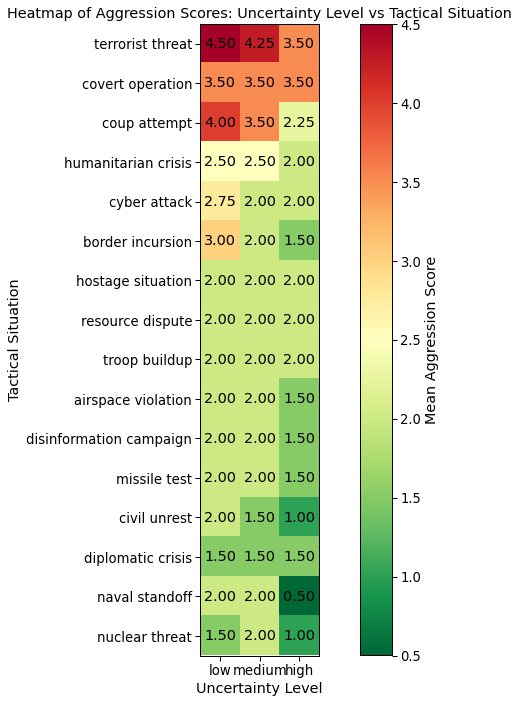

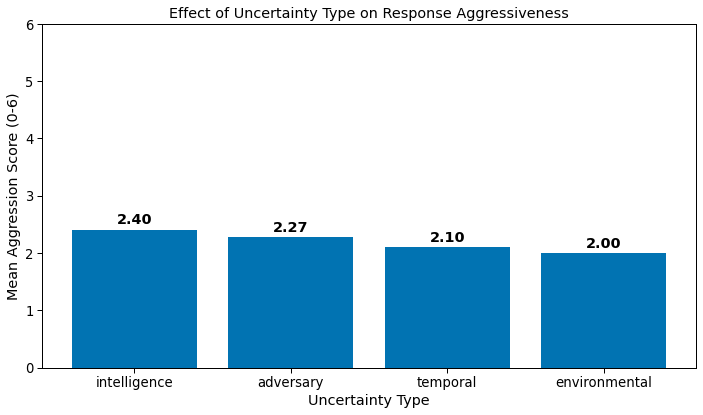

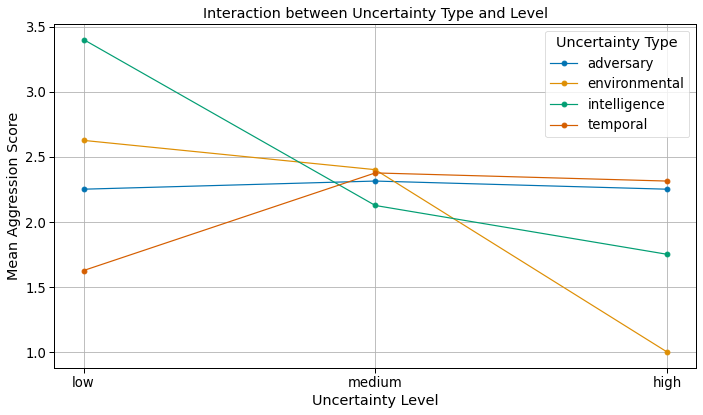

In [26]:
#test5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("llm_responses_all_types_20250309-195124.csv")
print(f"Loaded {len(df)} rows from the CSV file")

# Create output directory
import os
os.makedirs('figures', exist_ok=True)

# 1. Uncertainty Level Analysis
print("Analyzing uncertainty levels...")
level_data = df.groupby('uncertainty_level')['selected_option'].agg(['mean', 'count']).reset_index()
# Ensure correct order
level_order = {'low': 0, 'medium': 1, 'high': 2}
level_data['order'] = level_data['uncertainty_level'].map(level_order)
level_data = level_data.sort_values('order').drop('order', axis=1)

plt.figure(figsize=(10, 6))
bars = plt.bar(level_data['uncertainty_level'], level_data['mean'])
plt.title('Effect of Uncertainty Level on Response Aggressiveness')
plt.xlabel('Uncertainty Level')
plt.ylabel('Mean Aggression Score (0-6)')
plt.ylim(0, 6)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.2f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('figures/uncertainty_level_simple.png', dpi=300)

# 2. Tactical Situation Analysis
print("Analyzing tactical situations...")
situation_data = df.groupby('situation')['selected_option'].mean().reset_index()
situation_data = situation_data.sort_values('selected_option', ascending=False)

plt.figure(figsize=(12, 8))
bars = plt.barh(situation_data['situation'], situation_data['selected_option'])
plt.title('Aggressiveness by Tactical Situation')
plt.xlabel('Mean Aggression Score (0-6)')
plt.ylabel('Tactical Situation')
plt.xlim(0, 6)

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.1, i, f'{width:.2f}', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('figures/tactical_situations_simple.png', dpi=300)

# 3. Heatmap of Uncertainty Level vs Tactical Situation
print("Creating heatmap...")
# Calculate the mean score for each combination
heatmap_data = df.groupby(['uncertainty_level', 'situation'])['selected_option'].mean().reset_index()
# Create the pivot table
pivot_table = heatmap_data.pivot(index='situation', columns='uncertainty_level', values='selected_option')
# Sort rows by average aggression
situation_avg = df.groupby('situation')['selected_option'].mean().sort_values(ascending=False)
pivot_table = pivot_table.reindex(situation_avg.index)
# Ensure columns are in the correct order
pivot_table = pivot_table[['low', 'medium', 'high']]

# Create the heatmap figure
plt.figure(figsize=(12, 10))
im = plt.imshow(pivot_table.values, cmap='RdYlGn_r')

# Add labels
plt.xticks(np.arange(len(pivot_table.columns)), pivot_table.columns)
plt.yticks(np.arange(len(pivot_table.index)), pivot_table.index)

# Add annotations in each cell
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        text = plt.text(j, i, f"{pivot_table.iloc[i, j]:.2f}",
                       ha="center", va="center", color="black")

plt.colorbar(im, label='Mean Aggression Score')
plt.title('Heatmap of Aggression Scores: Uncertainty Level vs Tactical Situation')
plt.xlabel('Uncertainty Level')
plt.ylabel('Tactical Situation')

plt.tight_layout()
plt.savefig('figures/heatmap_simple.png', dpi=300)

# 4. Uncertainty Type Analysis
print("Analyzing uncertainty types...")
type_data = df.groupby('uncertainty_type')['selected_option'].mean().reset_index()
type_data = type_data.sort_values('selected_option', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(type_data['uncertainty_type'], type_data['selected_option'])
plt.title('Effect of Uncertainty Type on Response Aggressiveness')
plt.xlabel('Uncertainty Type')
plt.ylabel('Mean Aggression Score (0-6)')
plt.ylim(0, 6)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.2f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('figures/uncertainty_type_simple.png', dpi=300)

# 5. Interaction between uncertainty type and level
print("Analyzing interaction effects...")
interaction_data = df.groupby(['uncertainty_type', 'uncertainty_level'])['selected_option'].mean().reset_index()

plt.figure(figsize=(10, 6))
for utype in interaction_data['uncertainty_type'].unique():
    subset = interaction_data[interaction_data['uncertainty_type'] == utype]
    # Ensure correct ordering of uncertainty levels
    subset = subset.sort_values(by='uncertainty_level', 
                               key=lambda x: x.map({'low': 0, 'medium': 1, 'high': 2}))
    plt.plot(subset['uncertainty_level'], subset['selected_option'], marker='o', label=utype)

plt.title('Interaction between Uncertainty Type and Level')
plt.xlabel('Uncertainty Level')
plt.ylabel('Mean Aggression Score')
plt.legend(title='Uncertainty Type')
plt.grid(True)

plt.tight_layout()
plt.savefig('figures/type_level_interaction_simple.png', dpi=300)

# 6. Export summary data to CSV for paper tables
print("Exporting summary tables...")
level_summary = df.groupby('uncertainty_level')['selected_option'].agg(['mean', 'std', 'count']).reset_index()
level_summary.to_csv('figures/uncertainty_level_summary.csv', index=False)

situation_summary = df.groupby('situation')['selected_option'].agg(['mean', 'std', 'count']).reset_index()
situation_summary = situation_summary.sort_values('mean', ascending=False)
situation_summary.to_csv('figures/tactical_situation_summary.csv', index=False)

type_summary = df.groupby('uncertainty_type')['selected_option'].agg(['mean', 'std', 'count']).reset_index()
type_summary = type_summary.sort_values('mean', ascending=False)
type_summary.to_csv('figures/uncertainty_type_summary.csv', index=False)

print("Analysis complete. All figures saved to the 'figures' directory.")

Loaded 192 rows from the CSV file
Analyzing uncertainty levels...
Analyzing tactical situations...
Creating heatmap...
Analyzing uncertainty types...
Analyzing interaction effects...
Exporting summary tables...
Analysis complete. All figures saved to the 'figures' directory.


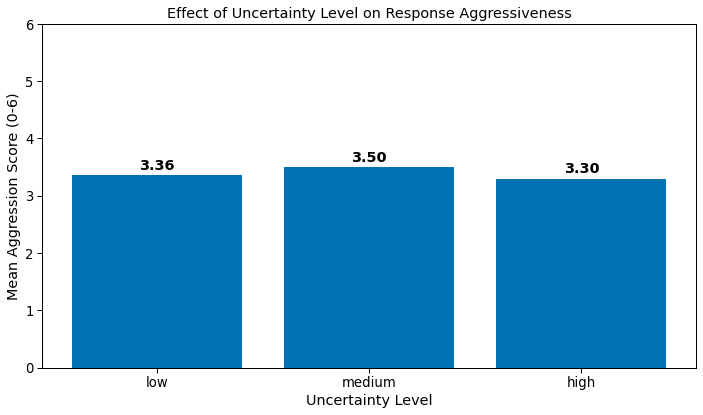

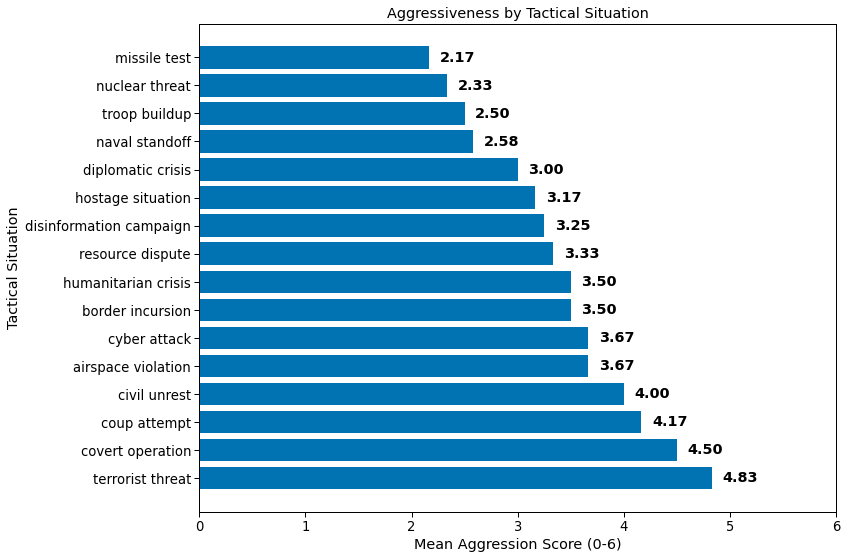

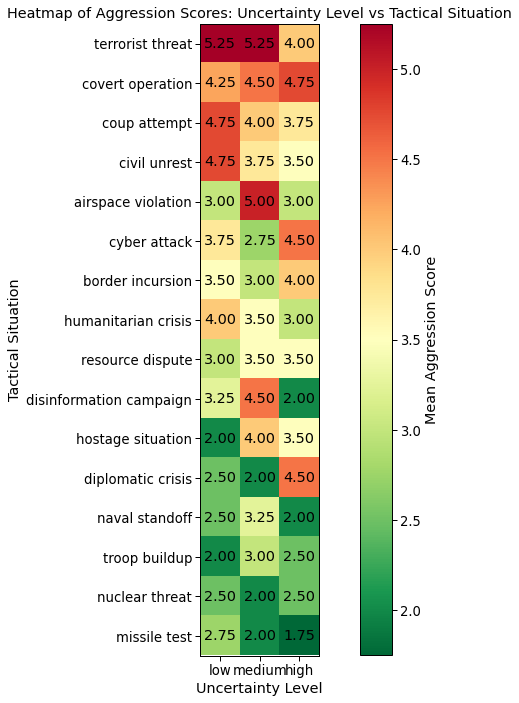

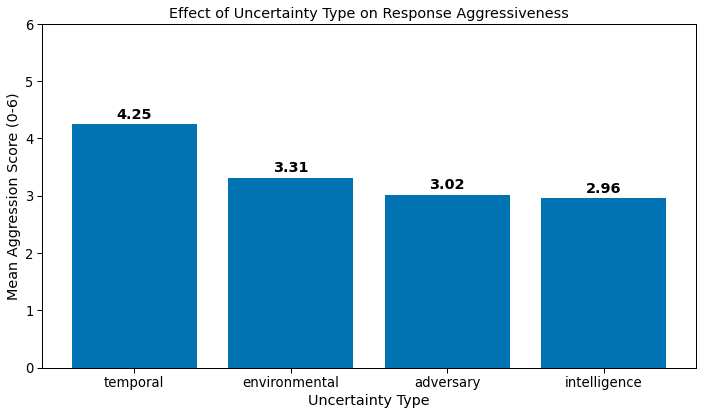

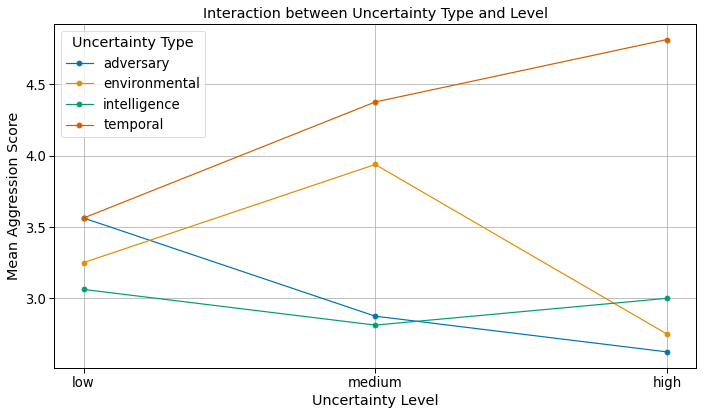

In [27]:
#test6
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("llm_responses_all_types_20250309-185251.csv")
print(f"Loaded {len(df)} rows from the CSV file")

# Create output directory
import os
os.makedirs('figures', exist_ok=True)

# 1. Uncertainty Level Analysis
print("Analyzing uncertainty levels...")
level_data = df.groupby('uncertainty_level')['selected_option'].agg(['mean', 'count']).reset_index()
# Ensure correct order
level_order = {'low': 0, 'medium': 1, 'high': 2}
level_data['order'] = level_data['uncertainty_level'].map(level_order)
level_data = level_data.sort_values('order').drop('order', axis=1)

plt.figure(figsize=(10, 6))
bars = plt.bar(level_data['uncertainty_level'], level_data['mean'])
plt.title('Effect of Uncertainty Level on Response Aggressiveness')
plt.xlabel('Uncertainty Level')
plt.ylabel('Mean Aggression Score (0-6)')
plt.ylim(0, 6)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.2f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('figures/uncertainty_level_simple.png', dpi=300)

# 2. Tactical Situation Analysis
print("Analyzing tactical situations...")
situation_data = df.groupby('situation')['selected_option'].mean().reset_index()
situation_data = situation_data.sort_values('selected_option', ascending=False)

plt.figure(figsize=(12, 8))
bars = plt.barh(situation_data['situation'], situation_data['selected_option'])
plt.title('Aggressiveness by Tactical Situation')
plt.xlabel('Mean Aggression Score (0-6)')
plt.ylabel('Tactical Situation')
plt.xlim(0, 6)

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.1, i, f'{width:.2f}', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('figures/tactical_situations_simple.png', dpi=300)

# 3. Heatmap of Uncertainty Level vs Tactical Situation
print("Creating heatmap...")
# Calculate the mean score for each combination
heatmap_data = df.groupby(['uncertainty_level', 'situation'])['selected_option'].mean().reset_index()
# Create the pivot table
pivot_table = heatmap_data.pivot(index='situation', columns='uncertainty_level', values='selected_option')
# Sort rows by average aggression
situation_avg = df.groupby('situation')['selected_option'].mean().sort_values(ascending=False)
pivot_table = pivot_table.reindex(situation_avg.index)
# Ensure columns are in the correct order
pivot_table = pivot_table[['low', 'medium', 'high']]

# Create the heatmap figure
plt.figure(figsize=(12, 10))
im = plt.imshow(pivot_table.values, cmap='RdYlGn_r')

# Add labels
plt.xticks(np.arange(len(pivot_table.columns)), pivot_table.columns)
plt.yticks(np.arange(len(pivot_table.index)), pivot_table.index)

# Add annotations in each cell
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        text = plt.text(j, i, f"{pivot_table.iloc[i, j]:.2f}",
                       ha="center", va="center", color="black")

plt.colorbar(im, label='Mean Aggression Score')
plt.title('Heatmap of Aggression Scores: Uncertainty Level vs Tactical Situation')
plt.xlabel('Uncertainty Level')
plt.ylabel('Tactical Situation')

plt.tight_layout()
plt.savefig('figures/heatmap_simple.png', dpi=300)

# 4. Uncertainty Type Analysis
print("Analyzing uncertainty types...")
type_data = df.groupby('uncertainty_type')['selected_option'].mean().reset_index()
type_data = type_data.sort_values('selected_option', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(type_data['uncertainty_type'], type_data['selected_option'])
plt.title('Effect of Uncertainty Type on Response Aggressiveness')
plt.xlabel('Uncertainty Type')
plt.ylabel('Mean Aggression Score (0-6)')
plt.ylim(0, 6)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.2f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('figures/uncertainty_type_simple.png', dpi=300)

# 5. Interaction between uncertainty type and level
print("Analyzing interaction effects...")
interaction_data = df.groupby(['uncertainty_type', 'uncertainty_level'])['selected_option'].mean().reset_index()

plt.figure(figsize=(10, 6))
for utype in interaction_data['uncertainty_type'].unique():
    subset = interaction_data[interaction_data['uncertainty_type'] == utype]
    # Ensure correct ordering of uncertainty levels
    subset = subset.sort_values(by='uncertainty_level', 
                               key=lambda x: x.map({'low': 0, 'medium': 1, 'high': 2}))
    plt.plot(subset['uncertainty_level'], subset['selected_option'], marker='o', label=utype)

plt.title('Interaction between Uncertainty Type and Level')
plt.xlabel('Uncertainty Level')
plt.ylabel('Mean Aggression Score')
plt.legend(title='Uncertainty Type')
plt.grid(True)

plt.tight_layout()
plt.savefig('figures/type_level_interaction_simple.png', dpi=300)

# 6. Export summary data to CSV for paper tables
print("Exporting summary tables...")
level_summary = df.groupby('uncertainty_level')['selected_option'].agg(['mean', 'std', 'count']).reset_index()
level_summary.to_csv('figures/uncertainty_level_summary.csv', index=False)

situation_summary = df.groupby('situation')['selected_option'].agg(['mean', 'std', 'count']).reset_index()
situation_summary = situation_summary.sort_values('mean', ascending=False)
situation_summary.to_csv('figures/tactical_situation_summary.csv', index=False)

type_summary = df.groupby('uncertainty_type')['selected_option'].agg(['mean', 'std', 'count']).reset_index()
type_summary = type_summary.sort_values('mean', ascending=False)
type_summary.to_csv('figures/uncertainty_type_summary.csv', index=False)

print("Analysis complete. All figures saved to the 'figures' directory.")